<a href="https://colab.research.google.com/github/abdullah5282/Image-Segmentation-using-deep-learning/blob/main/Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/TrayDataset'
x_train_dir = os.path.join(DATA_DIR, 'XTrain')
y_train_dir = os.path.join(DATA_DIR, 'yTrain')

x_valid_dir = os.path.join(DATA_DIR, 'XVal')
y_valid_dir = os.path.join(DATA_DIR, 'yVal')

x_test_dir = os.path.join(DATA_DIR, 'XTest')
y_test_dir = os.path.join(DATA_DIR, 'yTest')

In [3]:
CLASSES = ['background','tray','cutlery','form','straw','meatball',
               'beef','roastlamb','beeftomatocasserole','ham','bean','cucumber',
               'leaf','tomato','boiledrice','beefmexicanmeatballs',
               'spinachandpumpkinrisotto','bakedfish','gravy','zucchini','carrot',
               'broccoli','pumpkin','celery','sandwich','sidesalad','tartaresauce',
               'jacketpotato','creamedpotato','bread','margarine',
               'soup','apple','cannedfruit','milk','vanillayogurt',
               'jelly','custard','lemonsponge','juice','applejuice','orangejuice','water']

In [4]:
from torch.utils.data import Dataset as BaseDataset

In [5]:
class Dataset(BaseDataset):
    """TrayDataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        #get images(x) and masks(y) ids
        self.ids_x = sorted(os.listdir(images_dir))
        #['1001a01.jpg', '1005a.jpg', '1006a72.jpg', '2001a72.jpg', '2002a.jpg'] etc.
        self.ids_y = sorted(os.listdir(masks_dir))
        
        #get images(x) and masks(y) full paths (fps)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids_x]
        #'/content/drive/My Drive/Colab Notebooks/TrayDataset/XTest/1001a01.jpg'
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids_y]
        
        # convert str names to class values on masks
        self.class_values = [CLASSES.index(cls.lower()) for cls in classes]
        self.augmentation = augmentation
        self.preprocessing = preprocessing
        
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)
        
        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
 
        return image, mask
        
    def __len__(self):
        return len(self.ids_x)

In [6]:
def visualize(image, mask, label=None, truth=None,  augment=False):
    if truth is None:
        plt.figure(figsize=(14, 20))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        if augment == False:
            plt.title(f"{'Original Image'}")
        else:
            plt.title(f"{'Mask'}")

        plt.subplot(1, 2, 2)
        plt.imshow(mask)
        if label is not None:
            plt.title(f"{label.capitalize()}")

In [7]:
!pip3 install --upgrade pip && pip3 install h5py=='2.9.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h5py: filename=h5py-2.9.0-cp310-cp310-linux_x86_64.whl size=5480576 sha256=b20400dd4c26f10022b8e5e5421f1e649566bef58d1f00689a54463b3a1bd565
  Stored in directory: /root/.cache/pip/wheels/c0/d9/a1/5c4603e22344ca647a552d8c4e2f773d18026242ffff835520
Successfully built h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstalled h5py-3.8.0


<ipython-input-6-df076276b5fa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 20))


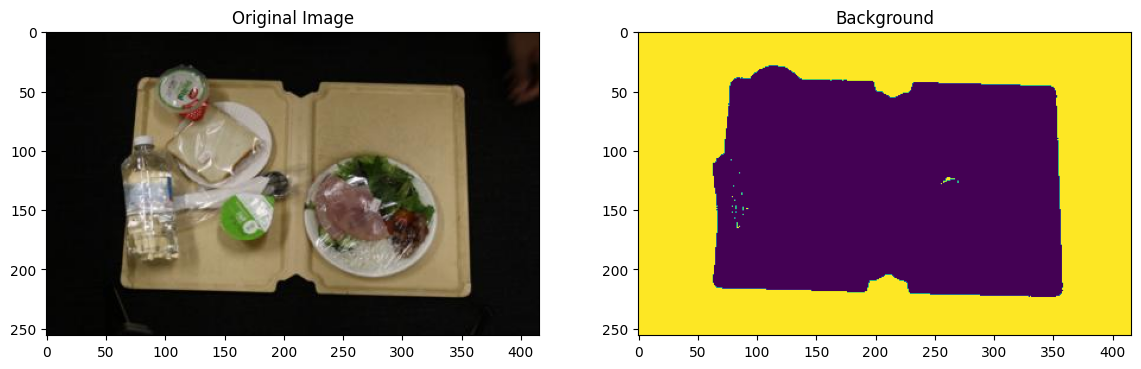

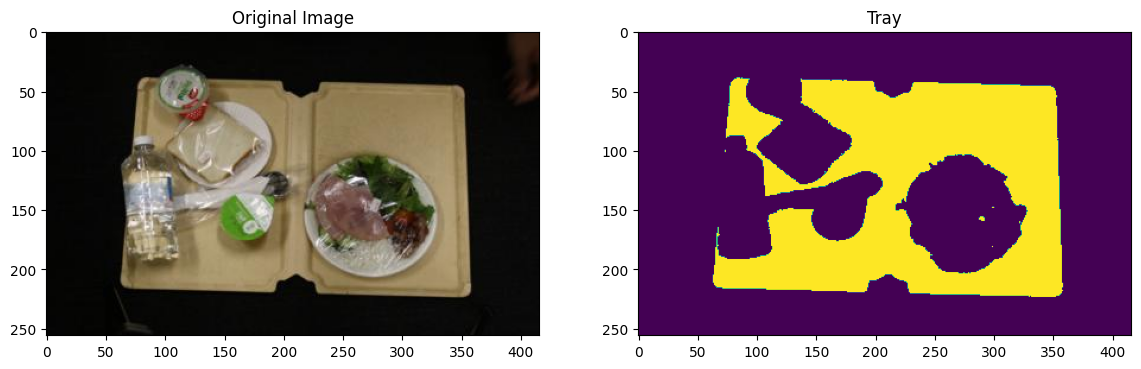

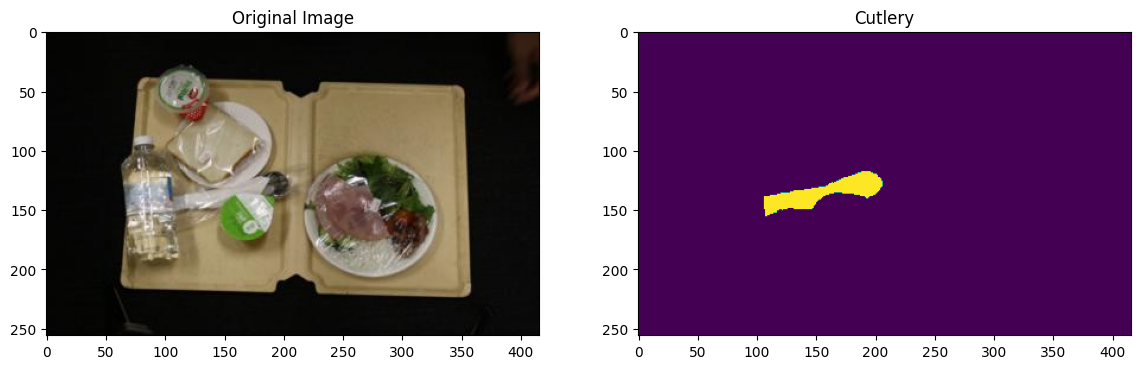

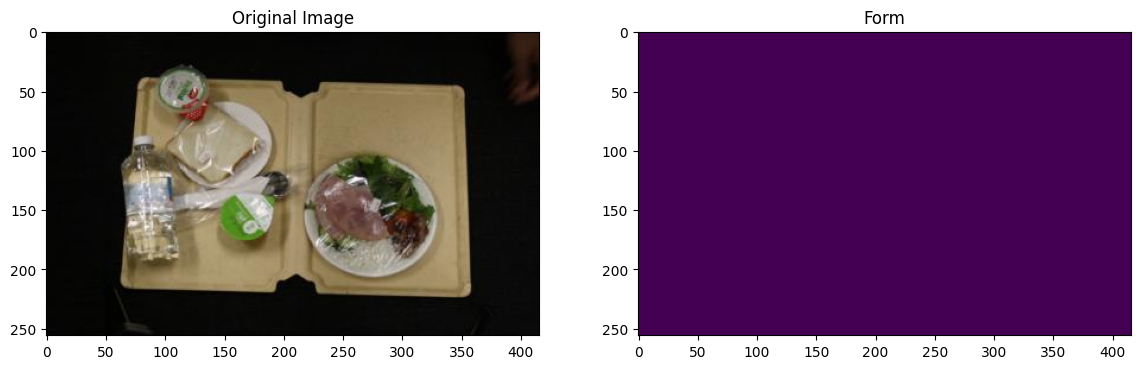

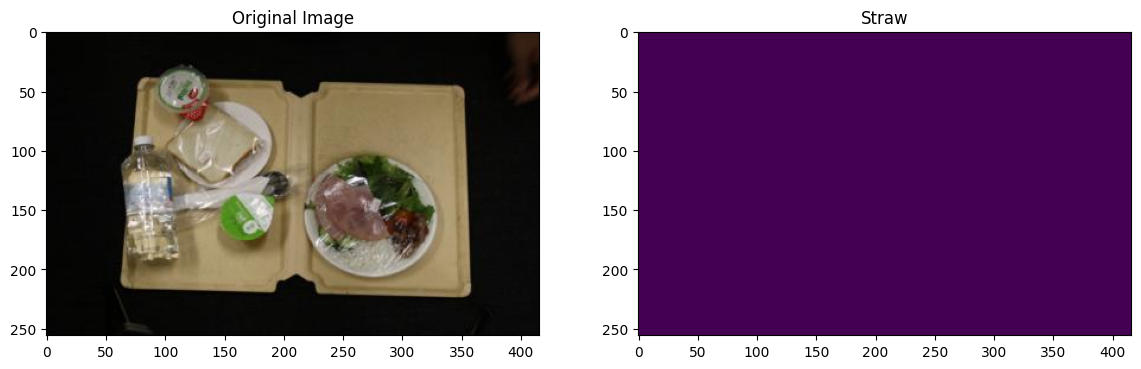

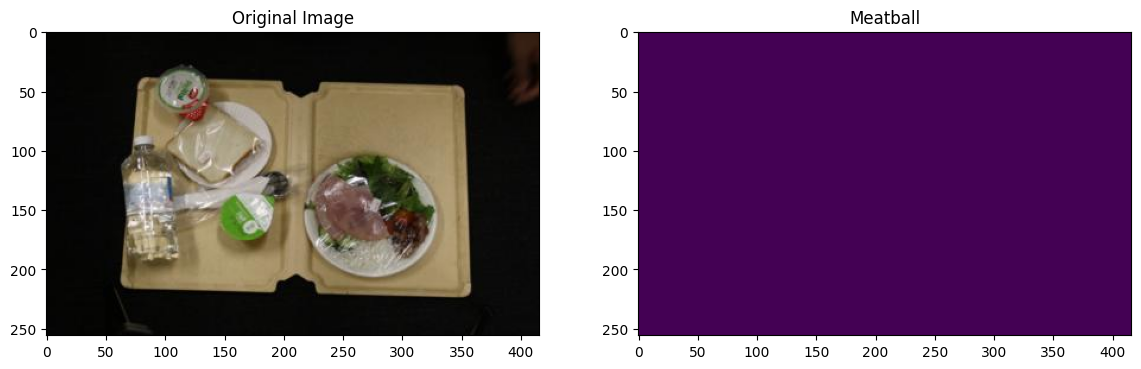

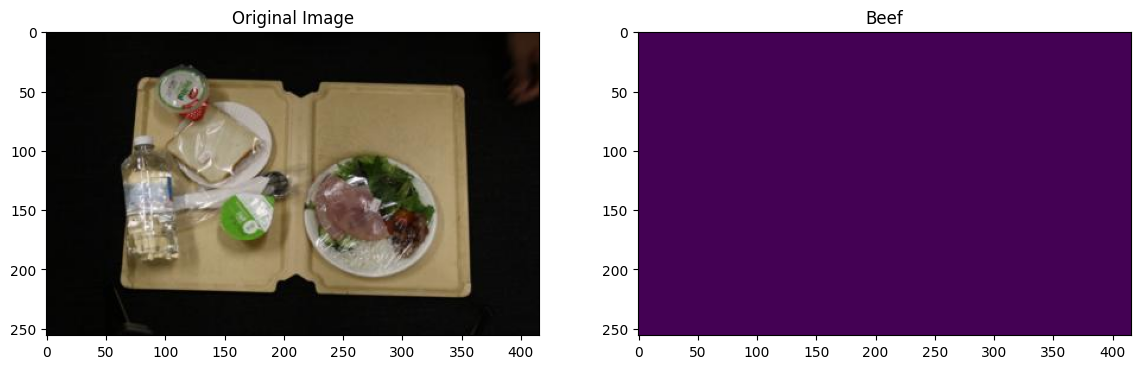

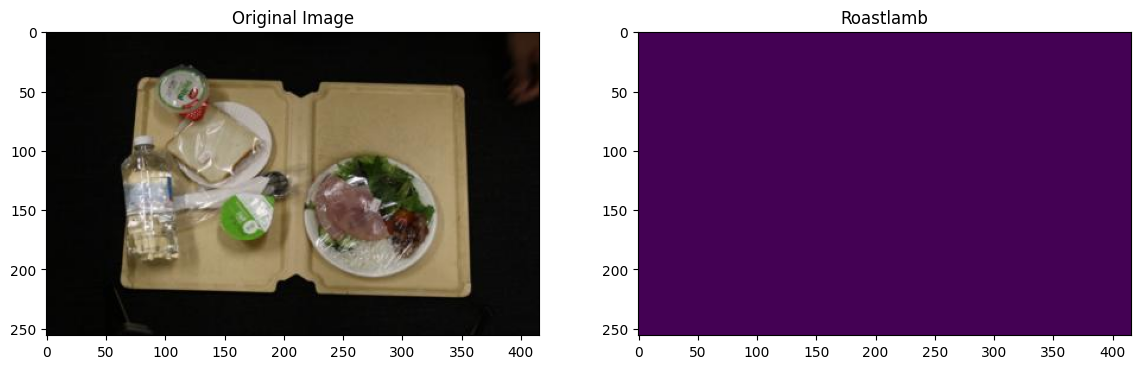

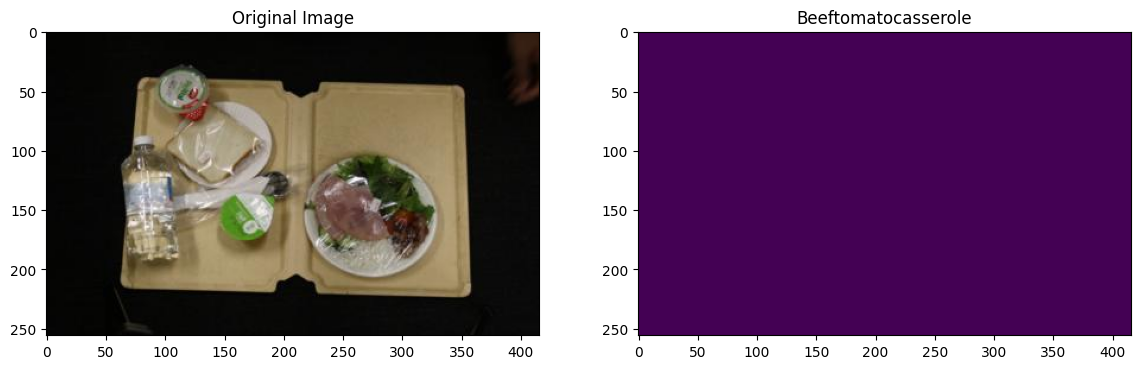

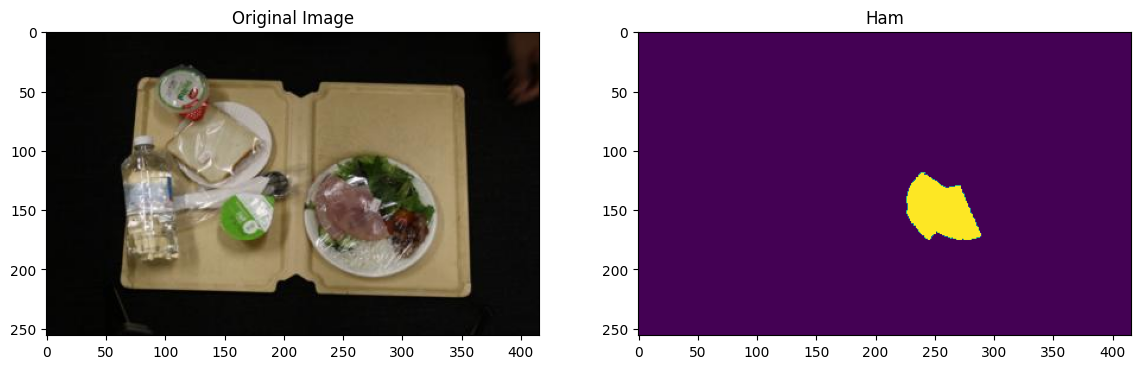

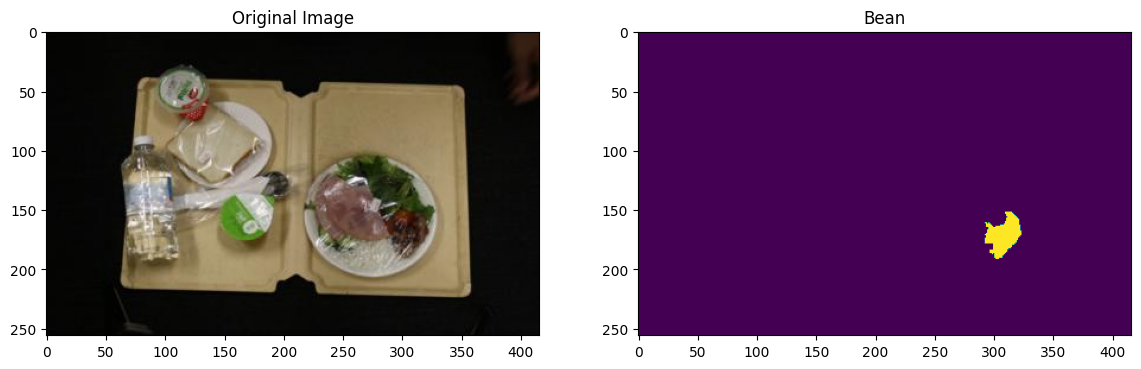

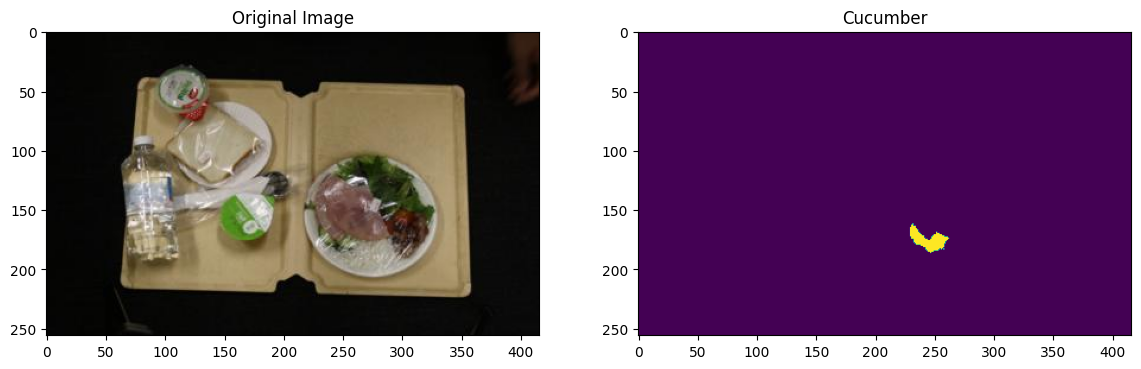

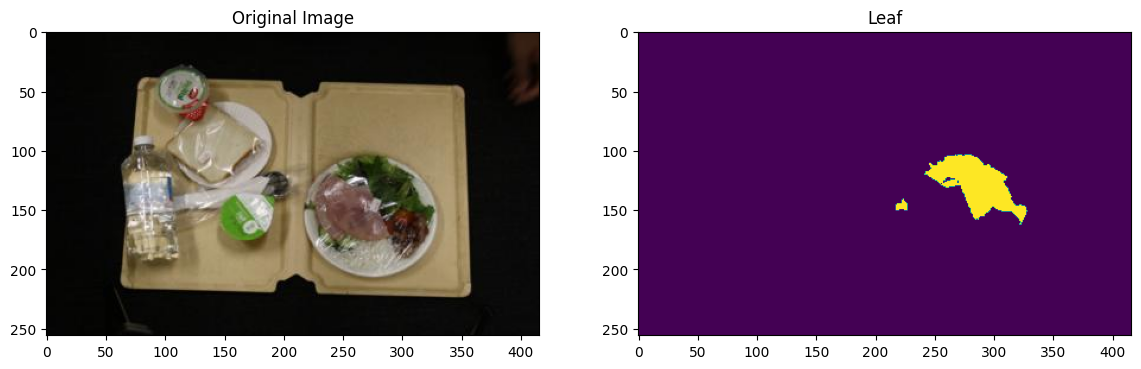

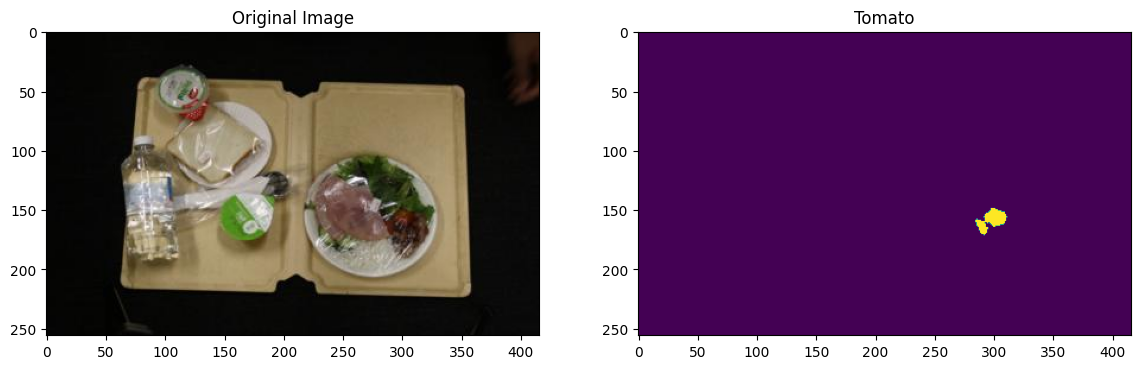

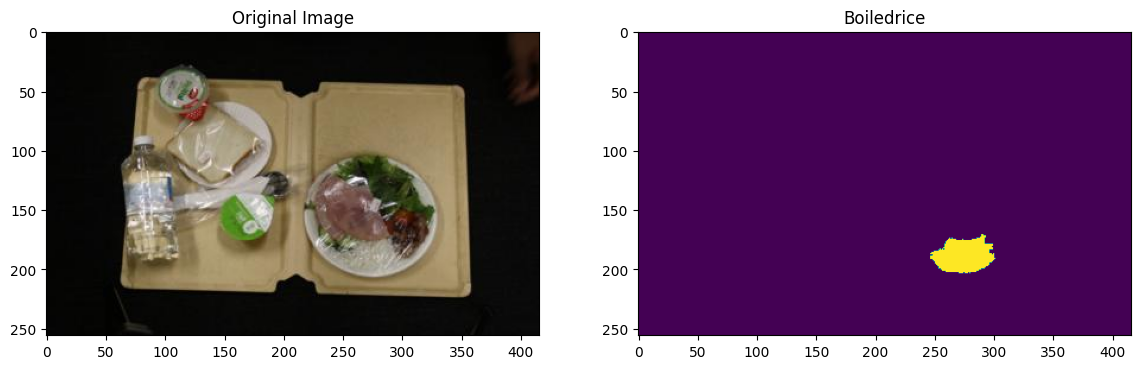

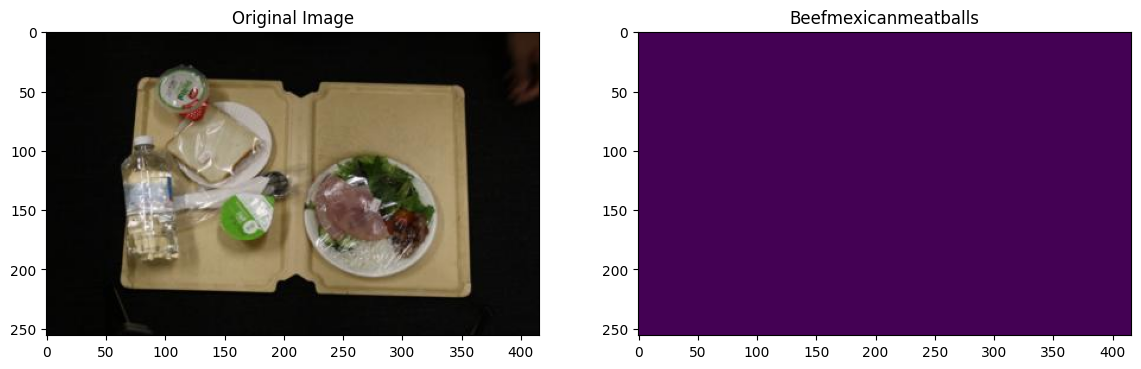

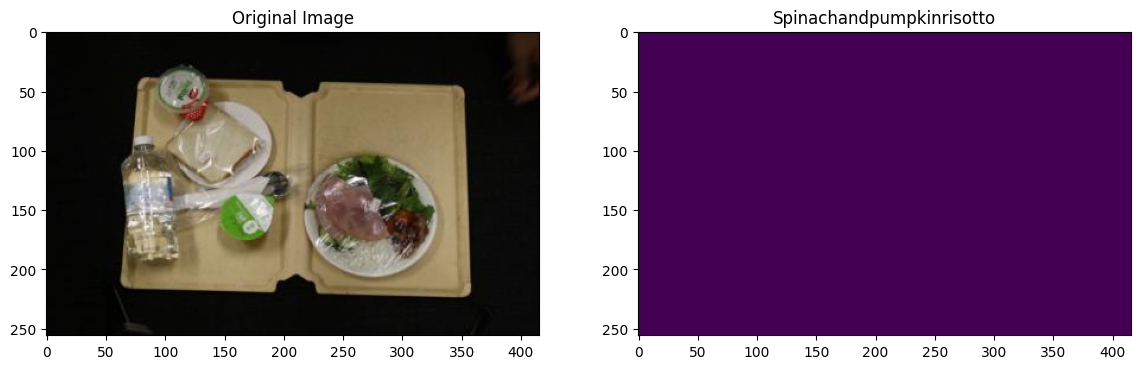

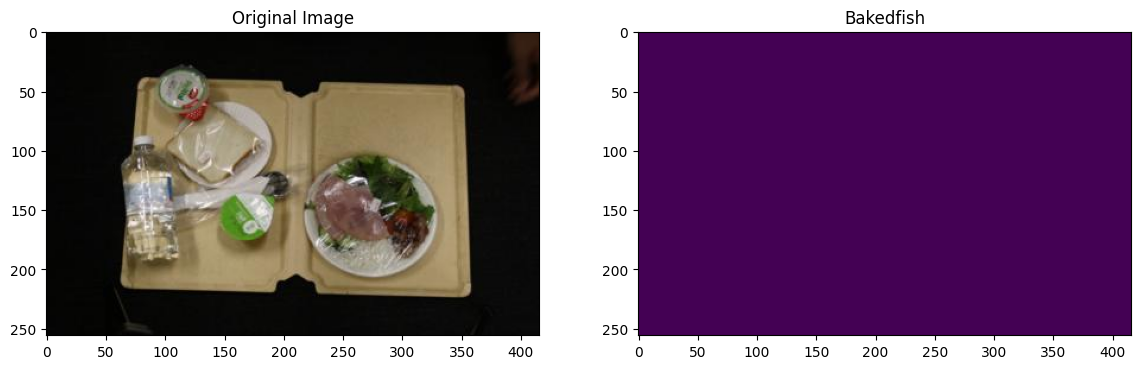

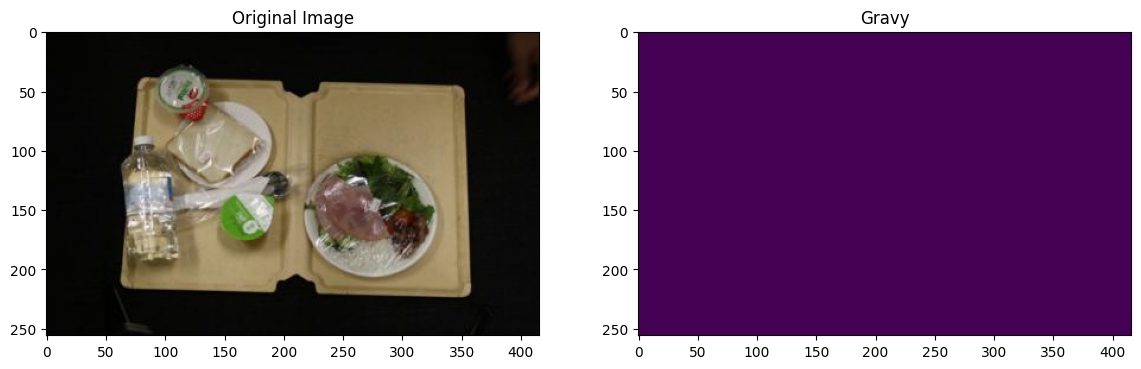

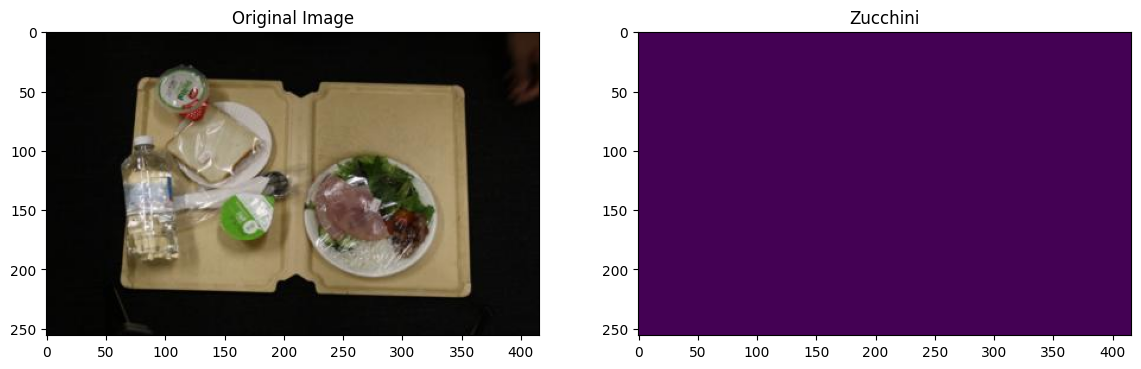

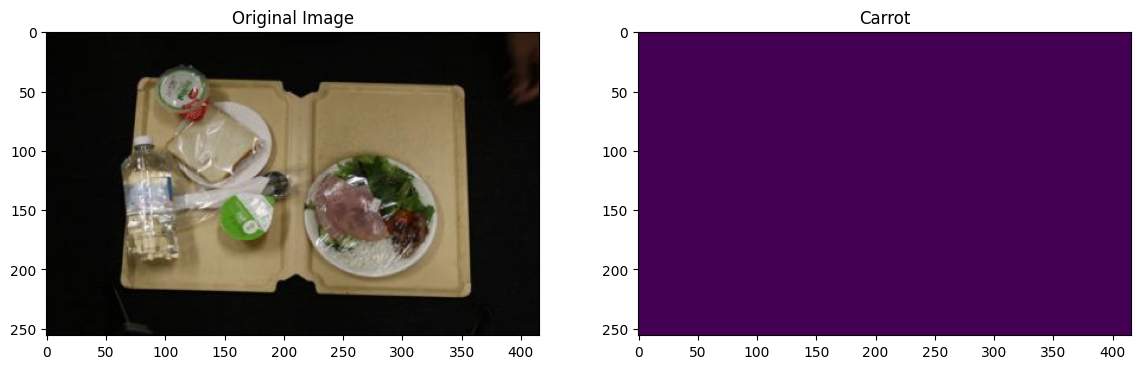

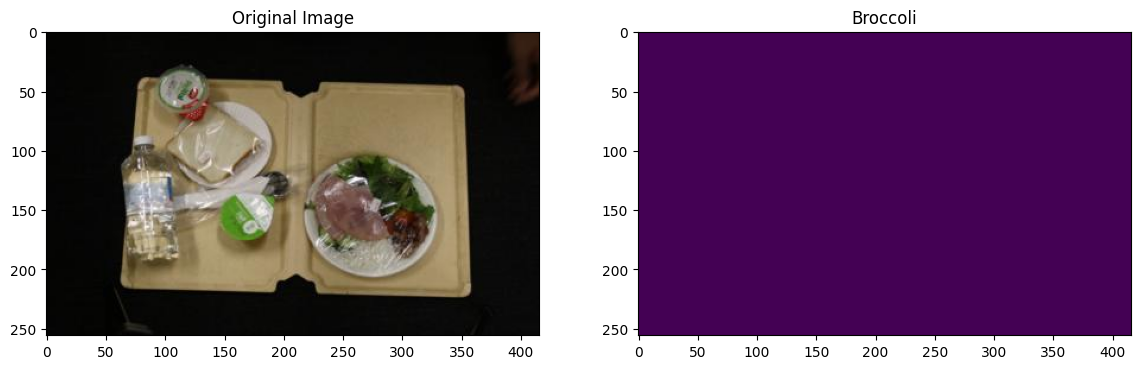

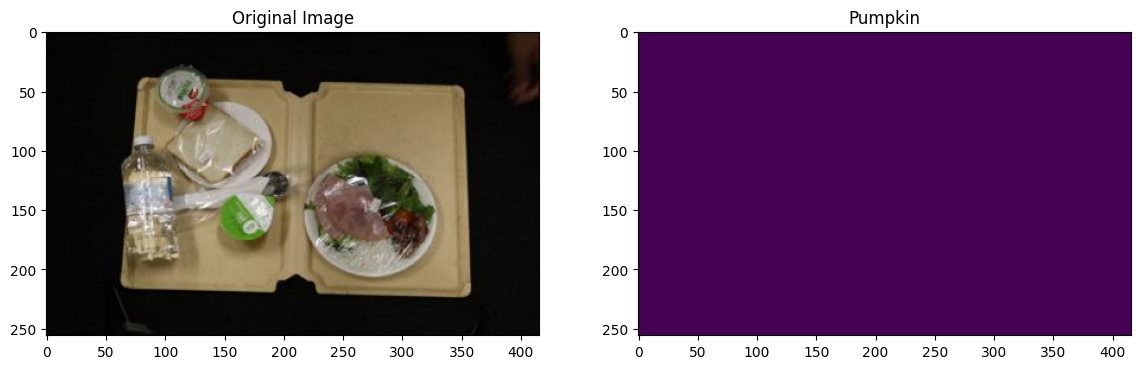

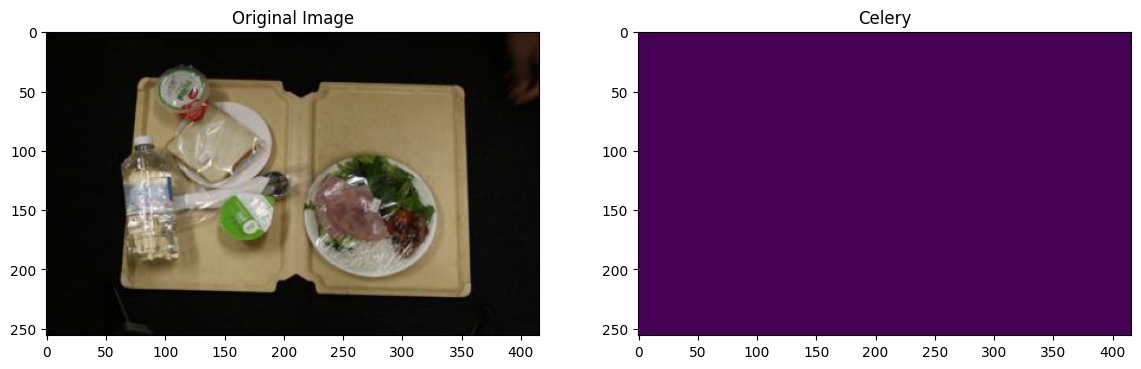

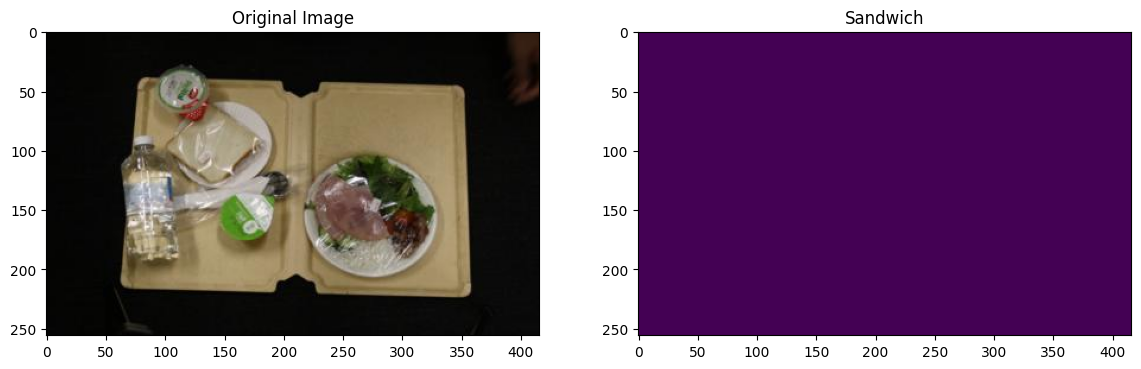

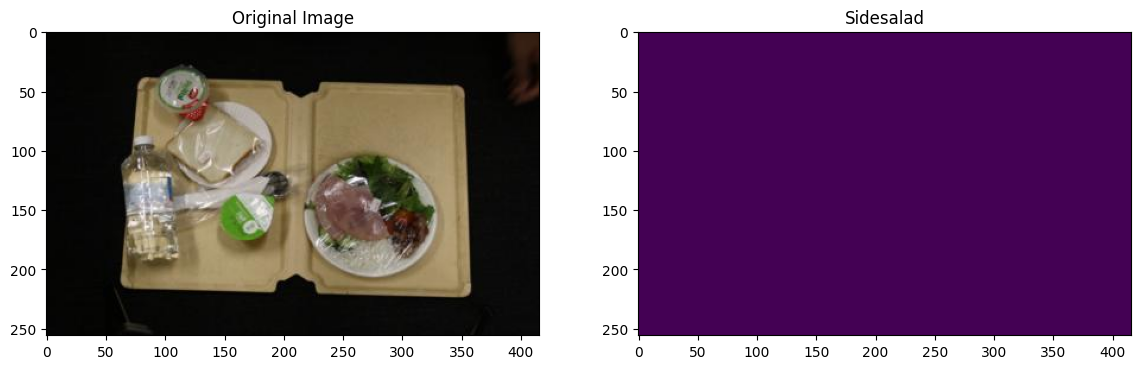

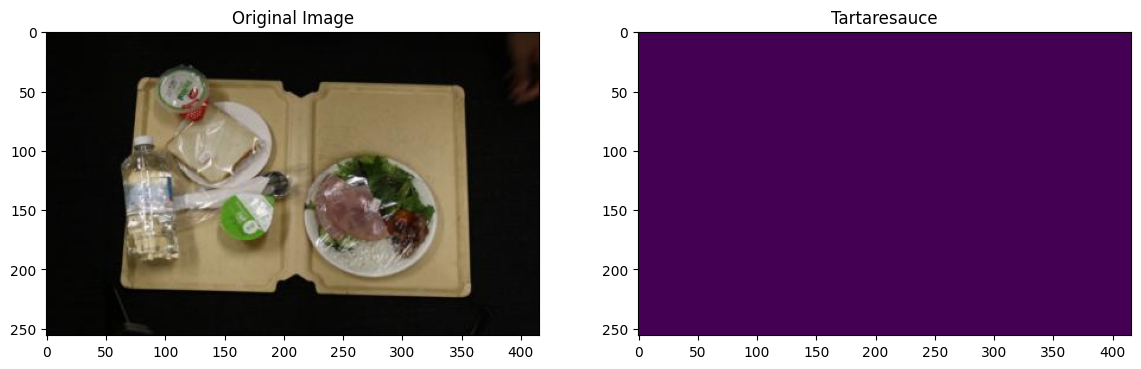

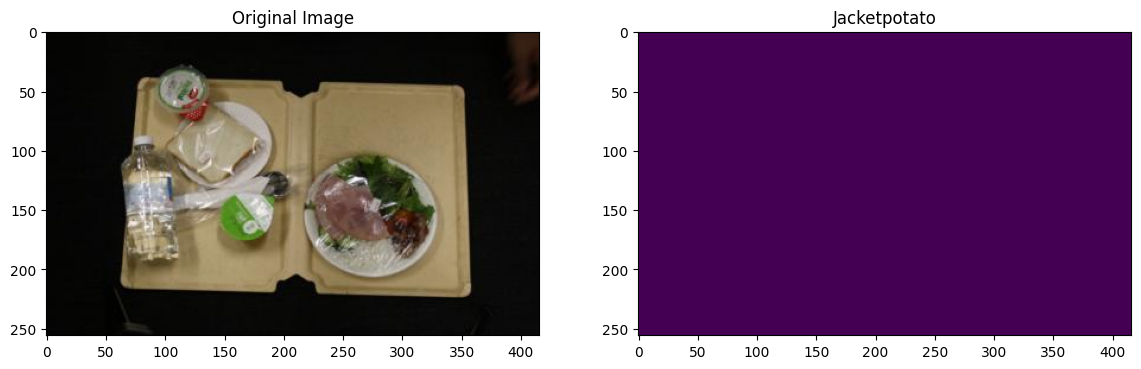

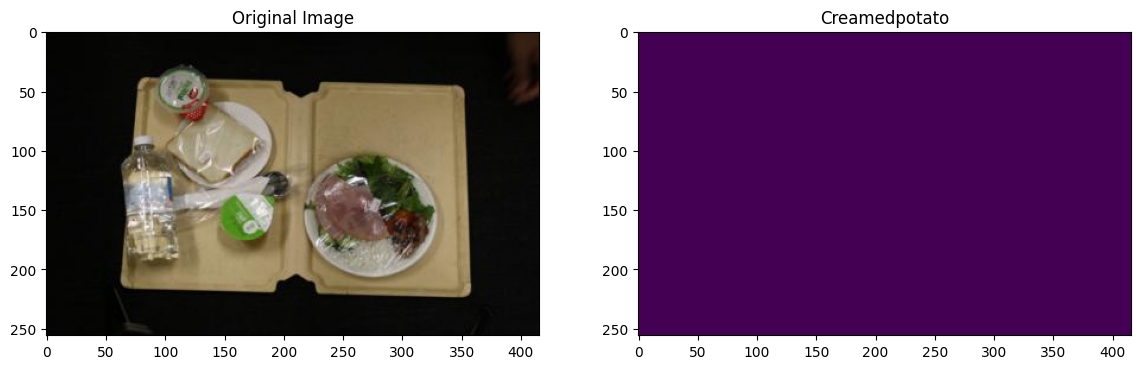

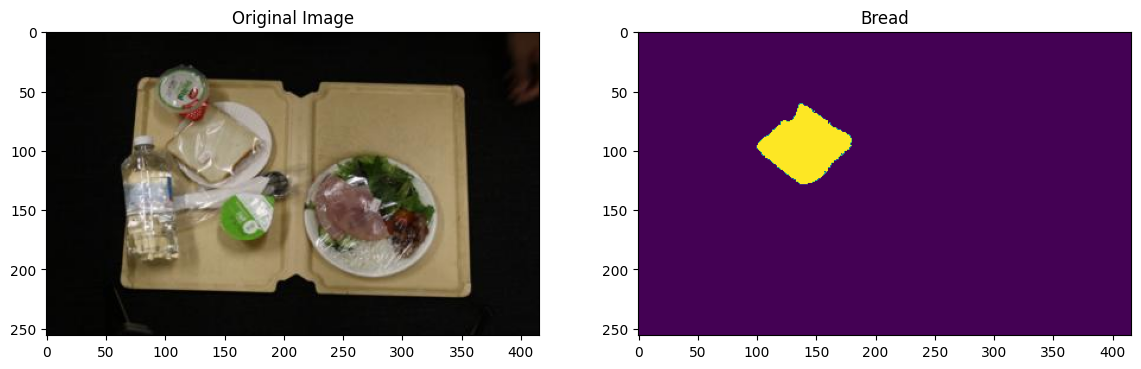

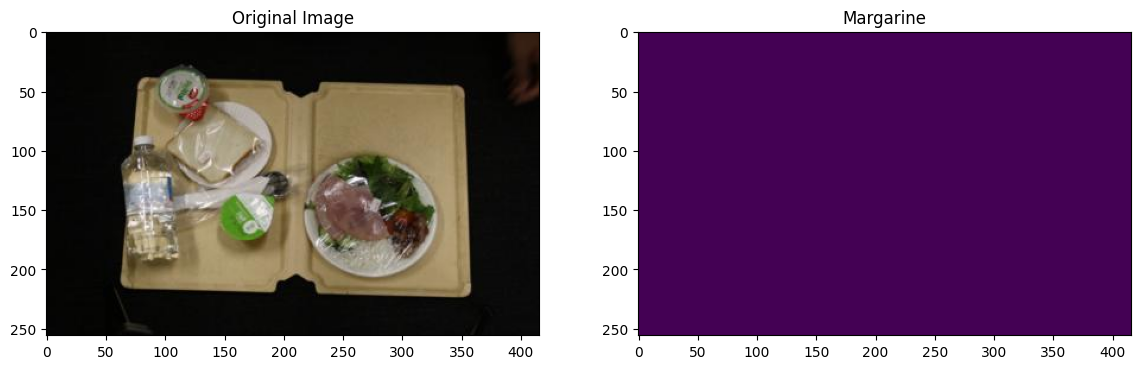

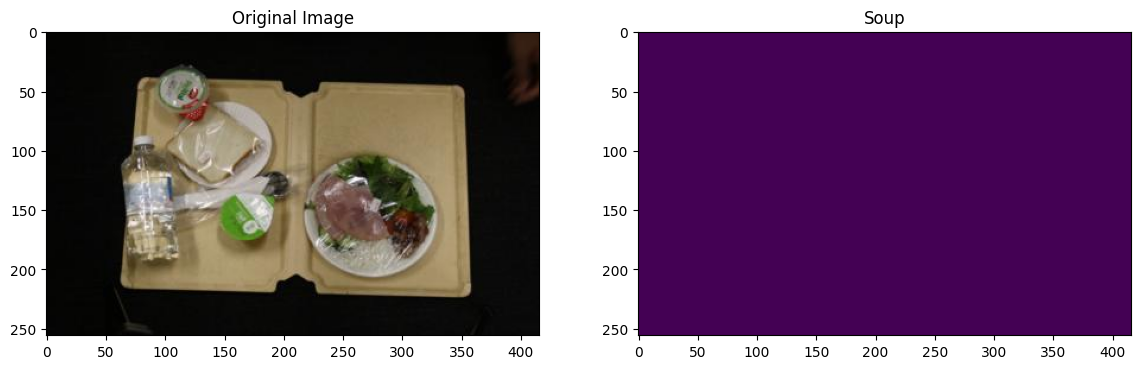

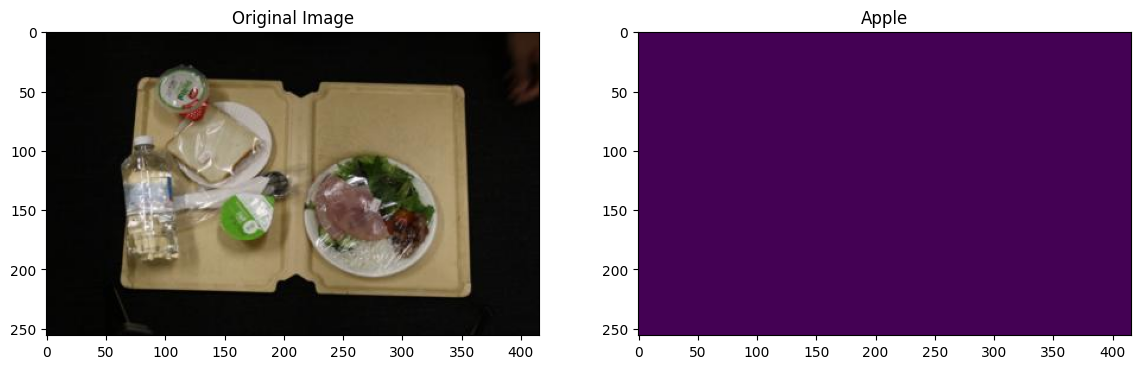

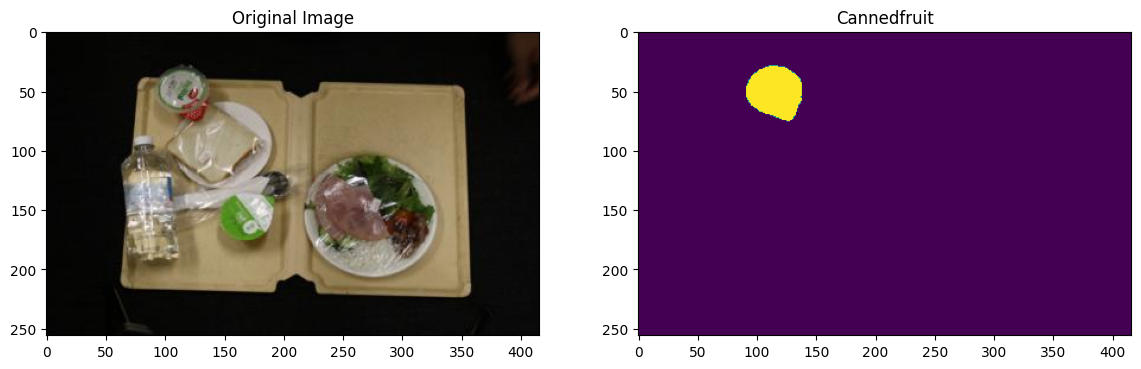

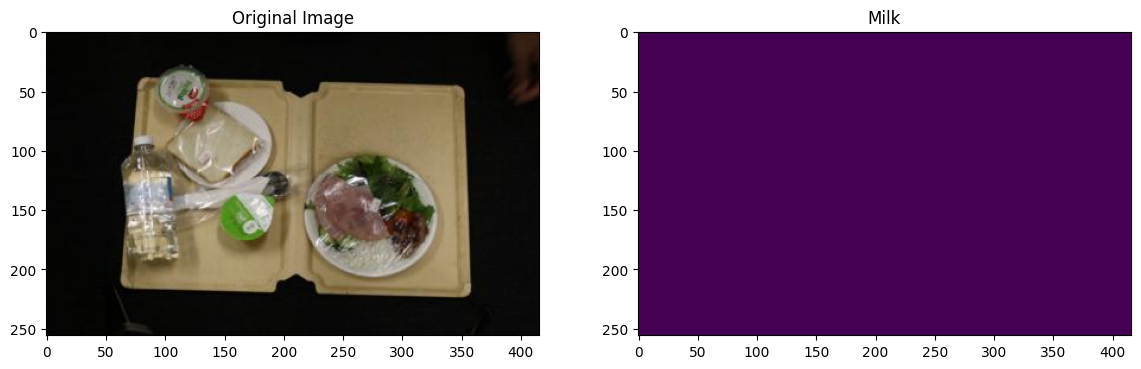

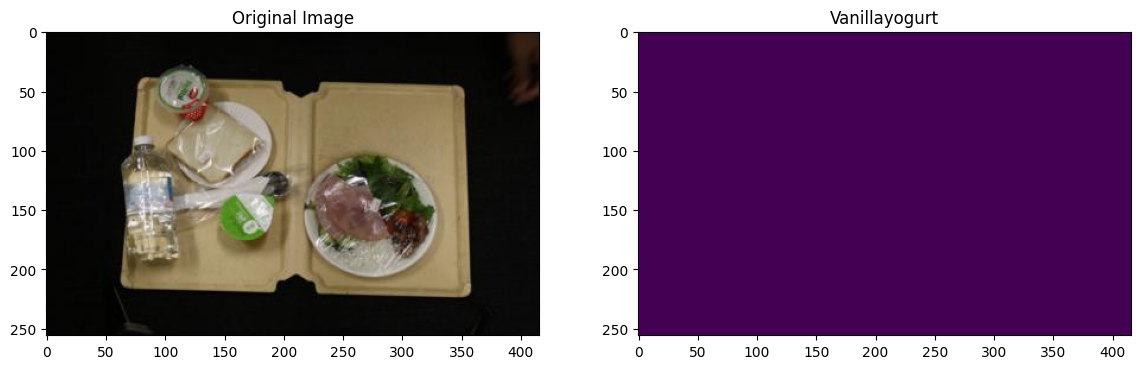

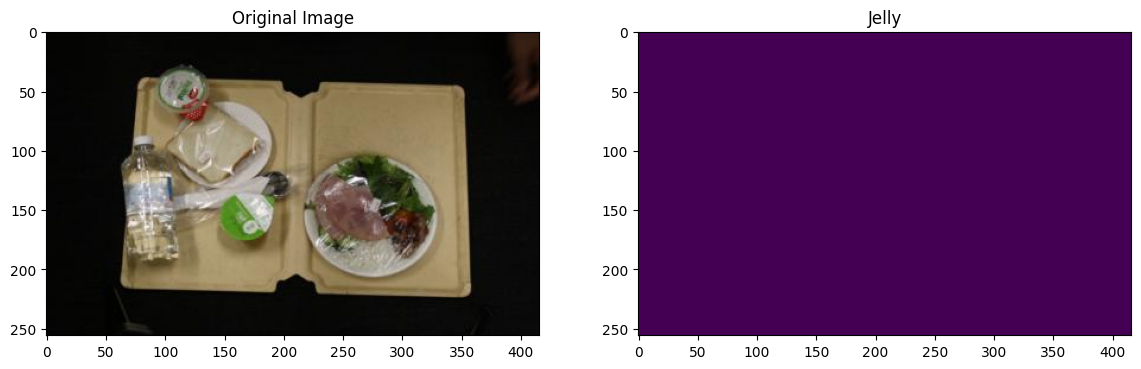

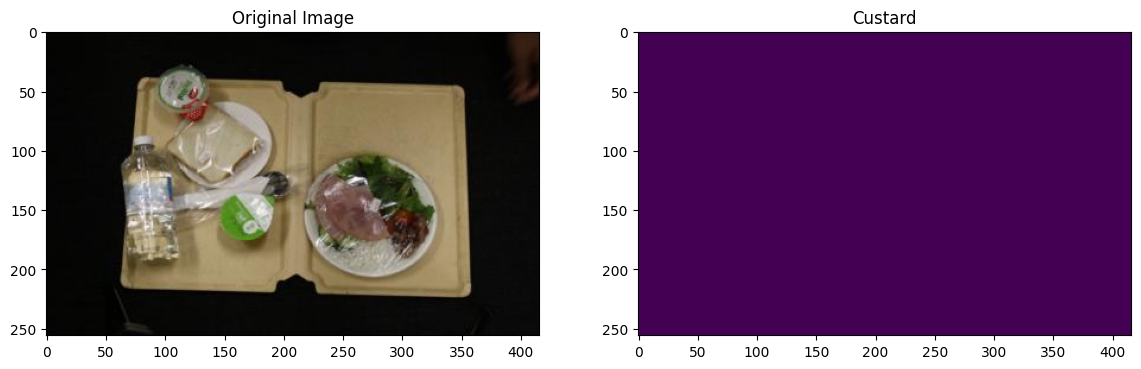

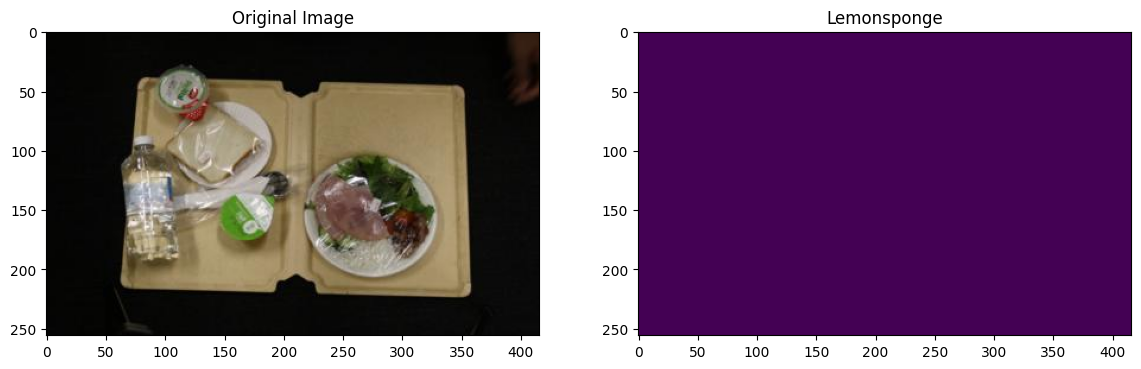

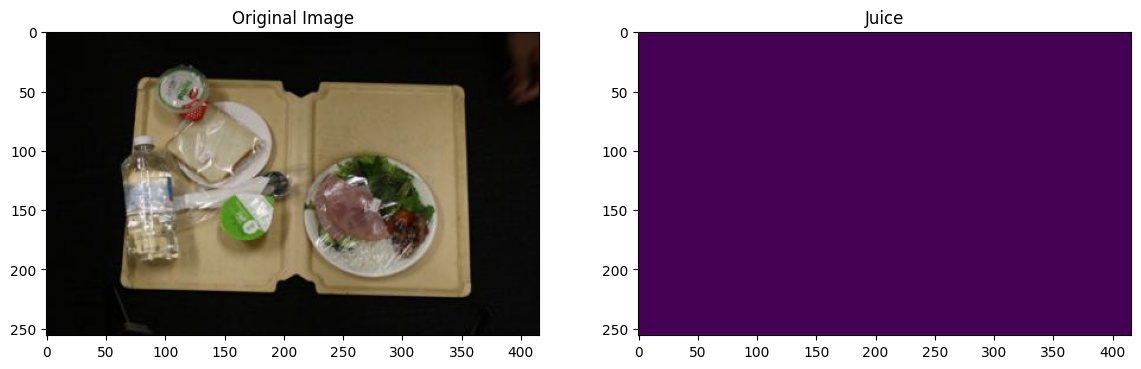

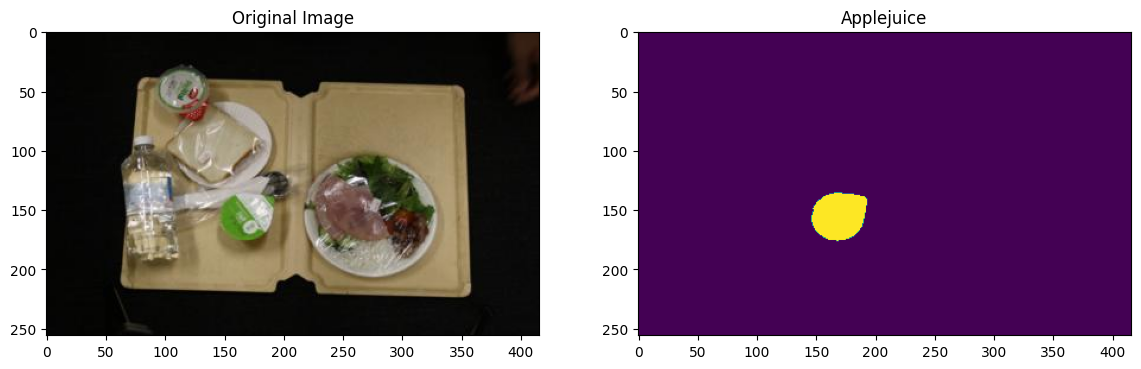

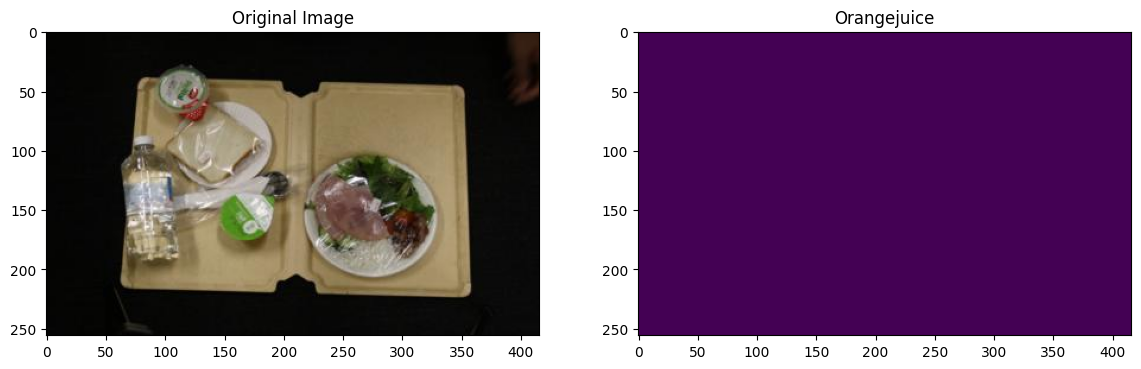

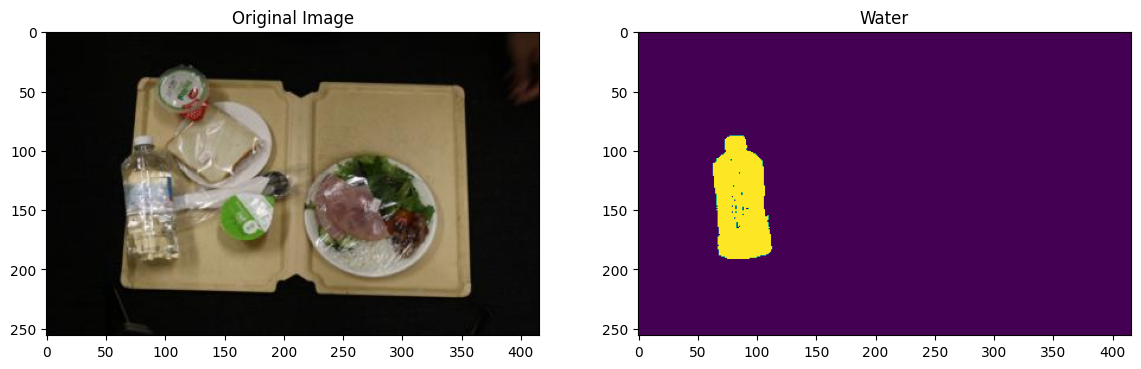

In [8]:
for label  in CLASSES:
    dataset = Dataset(x_test_dir, y_test_dir, classes=[label])
    image, mask = dataset[2]
    visualize(
        image=image, mask=mask.squeeze(),
        label  = label )